In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import sidetable as stb 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('airplane_clean.csv')
df.head()

,condition,currency,category,year,make,model,location,s/n,reg,total_hours,national_origin,standard_price,hour,price,country
0,Used,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740.0,United States,294900.0,upto 2000 hours,upto 500000 hours,USA
1,Used,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175.0,United States,184900.0,upto 1000 hours,upto 250000,USA
2,Used,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738.0,United States,609000.0,upto 1000 hours,upto 1000000 hours,USA
3,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175.0,United States,699000.0,upto 1000 hours,upto 1000000 hours,USA
4,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Indianapolis,\n\t IN...",Not Listed,N686AG,250.0,United States,749000.0,upto 1000 hours,upto 1000000 hours,USA


In [6]:
df.isna().sum()

# checking that there's null value in the column

condition          0
currency           0
category           0
year               0
make               0
model              0
location           0
s/n                0
reg                0
total_hours        0
national_origin    0
standard_price     0
hour               0
price              0
country            0
dtype: int64

In [8]:
df.info()

# there are some columns that needs to be encoded here like the condition 
# and country, and category as well 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   condition        2307 non-null   object 
 1   currency         2307 non-null   object 
 2   category         2307 non-null   object 
 3   year             2307 non-null   int64  
 4   make             2307 non-null   object 
 5   model            2307 non-null   object 
 6   location         2307 non-null   object 
 7   s/n              2307 non-null   object 
 8   reg              2307 non-null   object 
 9   total_hours      2307 non-null   float64
 10  national_origin  2307 non-null   object 
 11  standard_price   2307 non-null   float64
 12  hour             2307 non-null   object 
 13  price            2307 non-null   object 
 14  country          2307 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 270.5+ KB


### Encoding The Country Column


In [10]:
df['country'].unique()

# since there's only 2 value we will use 1 and 0 
# 1 is for USA while 0 is for other

array(['USA', 'Other'], dtype=object)

In [11]:
df['country'] = df['country'].map({'USA':1, 'Other':0})
df.head()

,condition,currency,category,year,make,model,location,s/n,reg,total_hours,national_origin,standard_price,hour,price,country
0,Used,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740.0,United States,294900.0,upto 2000 hours,upto 500000 hours,1
1,Used,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175.0,United States,184900.0,upto 1000 hours,upto 250000,1
2,Used,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738.0,United States,609000.0,upto 1000 hours,upto 1000000 hours,1
3,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175.0,United States,699000.0,upto 1000 hours,upto 1000000 hours,1
4,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Indianapolis,\n\t IN...",Not Listed,N686AG,250.0,United States,749000.0,upto 1000 hours,upto 1000000 hours,1


In [14]:
## condition column using get dummies

df = pd.get_dummies(data = df, columns = ['condition'])
df.head()

,currency,category,year,make,model,location,s/n,reg,total_hours,national_origin,standard_price,hour,price,country,condition_New,condition_Project,condition_Used
0,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740.0,United States,294900.0,upto 2000 hours,upto 500000 hours,1,0,0,1
1,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175.0,United States,184900.0,upto 1000 hours,upto 250000,1,0,0,1
2,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738.0,United States,609000.0,upto 1000 hours,upto 1000000 hours,1,0,0,1
3,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175.0,United States,699000.0,upto 1000 hours,upto 1000000 hours,1,0,0,1
4,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Indianapolis,\n\t IN...",Not Listed,N686AG,250.0,United States,749000.0,upto 1000 hours,upto 1000000 hours,1,0,0,1


In [17]:
df = pd.get_dummies(data = df, columns = ['category'])
df.head()

,currency,year,make,model,location,s/n,reg,total_hours,national_origin,standard_price,hour,price,country,condition_New,condition_Project,condition_Used,category_Gliders | Sailplanes,category_Gyrocopter,category_Military/Classic/Vintage,category_Multi Engine Piston,category_Piston Helicopters,category_Private Jets,category_Single Engine Piston,category_Turbine Helicopters,category_Turboprops,category_Twin Piston,category_Ultralight
0,USD,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740.0,United States,294900.0,upto 2000 hours,upto 500000 hours,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,USD,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175.0,United States,184900.0,upto 1000 hours,upto 250000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,USD,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738.0,United States,609000.0,upto 1000 hours,upto 1000000 hours,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,USD,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175.0,United States,699000.0,upto 1000 hours,upto 1000000 hours,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,USD,2016,BEECHCRAFT,G36 BONANZA,"Indianapolis,\n\t IN...",Not Listed,N686AG,250.0,United States,749000.0,upto 1000 hours,upto 1000000 hours,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


### Checking Correlation and Feature Selection

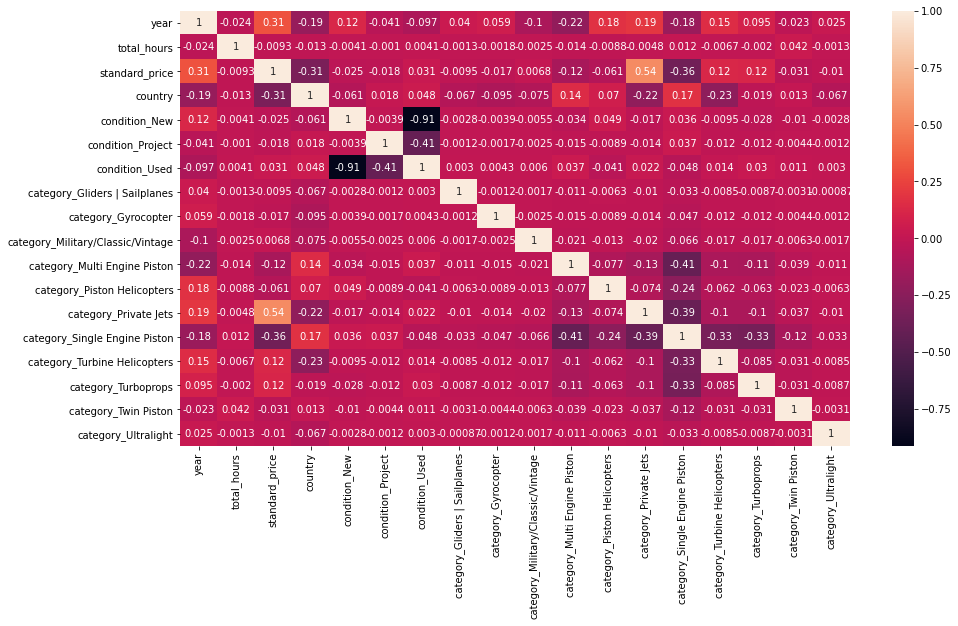

In [19]:
plt.figure(figsize = (15 , 8))
sns.heatmap(df.corr(), annot = True)

In [23]:
correlation = df.corr()
correlation['standard_price'].sort_values(ascending = False)[1:]

# we will use all the feature that has correlation value that's above 0.1 and below 0.1

category_Private Jets                0.537895
year                                 0.305695
category_Turbine Helicopters         0.124988
category_Turboprops                  0.117526
condition_Used                       0.030509
category_Military/Classic/Vintage    0.006753
total_hours                         -0.009322
category_Gliders | Sailplanes       -0.009493
category_Ultralight                 -0.010361
category_Gyrocopter                 -0.016673
condition_Project                   -0.017871
condition_New                       -0.025372
category_Twin Piston                -0.031059
category_Piston Helicopters         -0.061046
category_Multi Engine Piston        -0.115374
country                             -0.310827
category_Single Engine Piston       -0.358655
Name: standard_price, dtype: float64

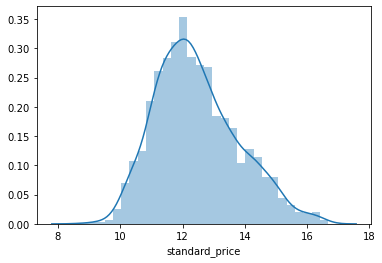

In [25]:
# since we know that our target is right skewed we will use log to normalize it

sns.distplot(np.log(df['standard_price']))

### Feature Selection and Model Building  

In [63]:
correlation['standard_price'].sort_values(ascending = False)[1:]

category_Private Jets                0.537895
year                                 0.305695
category_Turbine Helicopters         0.124988
category_Turboprops                  0.117526
condition_Used                       0.030509
category_Military/Classic/Vintage    0.006753
total_hours                         -0.009322
category_Gliders | Sailplanes       -0.009493
category_Ultralight                 -0.010361
category_Gyrocopter                 -0.016673
condition_Project                   -0.017871
condition_New                       -0.025372
category_Twin Piston                -0.031059
category_Piston Helicopters         -0.061046
category_Multi Engine Piston        -0.115374
country                             -0.310827
category_Single Engine Piston       -0.358655
Name: standard_price, dtype: float64

In [64]:
X = df[['category_Private Jets', 'year', 'category_Turbine Helicopters', 'category_Turboprops', 'condition_Used', 'category_Military/Classic/Vintage', 'category_Ultralight', 'category_Gyrocopter', 'condition_Project', 'condition_New', 'category_Twin Piston', 'category_Piston Helicopters', 'category_Multi Engine Piston', 'country', 'category_Single Engine Piston' ]]
y = np.log(df['standard_price'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


### Ridge Regression

In [65]:
ridge = Ridge(alpha = 2)

In [66]:
ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [69]:
ridge_predict = ridge.predict(X_test) 

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

# we can definitely see that there is over fitting with this model we will let it be and correct it at tuning

0.6772819893860837
0.6092085723136217


In [72]:
r2_ridge  = r2_score(y_test, ridge_predict)
MAE_ridge = mean_absolute_error(y_test, ridge_predict)
MSE_ridge = mean_squared_error(y_test, ridge_predict)
RMSE_ridge = np.sqrt(MSE_ridge)

In [73]:
print('Hasil Evaluation Matrix Ridge Regression : ')
print("")
print(f'MAE: {MAE_ridge}')
print(f'MSE:{MSE_ridge}')
print(f"RMSE : {RMSE_ridge}")
print(f"R2 : {r2_ridge}")

Hasil Evaluation Matrix Ridge Regression : 

MAE: 0.5869920650740801
MSE:0.6615304612620603
RMSE : 0.8133452288309437
R2 : 0.6092085723136217


### KNeighbor Regressor


In [96]:
knn = KNeighborsRegressor(n_neighbors= 6)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [97]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

# there is an overfitting with the model as well
# we will re check the feature selection if we have enough time

0.7719020721871943
0.6356179399478006


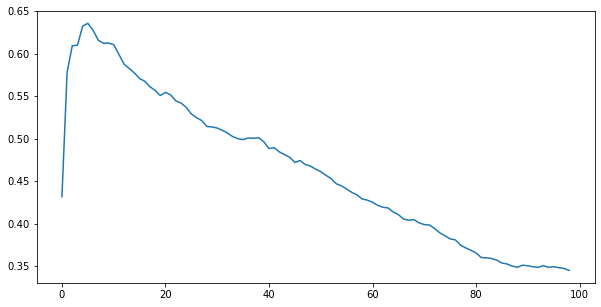

In [98]:
score = []

for k in range(1, 100):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))
    
plt.figure(figsize = (10, 5))
plt.plot(score)

## we can see from this graph that the maximum score would be reached if n = smowhere around 8 - 10

In [99]:
r2_knn  = r2_score(y_test, knn_predict)
MAE_knn = mean_absolute_error(y_test, knn_predict)
MSE_knn = mean_squared_error(y_test, knn_predict)
RMSE_knn = np.sqrt(MSE_knn)

In [100]:
print('Hasil Evaluation Matrix KNearestNeighbors : ')
print("")
print(f'MAE: {MAE_knn}')
print(f'MSE:{MSE_knn}')
print(f"RMSE : {RMSE_knn}")
print(f"R2 : {r2_knn}")

# KNN has a better evaluation matrix compared to ridge regression model however it still has an overfitting problem
# this might be due to the feature selection

Hasil Evaluation Matrix KNearestNeighbors : 

MAE: 0.5392096761463627
MSE:0.6168247693892632
RMSE : 0.7853819258101521
R2 : 0.6356179399478006


### Decision Tree

In [101]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_predict = DT.predict(X_test)

In [102]:
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

# decision tree has the worst overfitting compared to other models

0.849506926517517
0.5860825425461791


In [105]:
r2_DT =  r2_score(y_test, DT_predict)
MAE_DT = mean_absolute_error(y_test, DT_predict)
MSE_DT = mean_squared_error(y_test, DT_predict)
RMSE_DT = np.sqrt(MSE_DT)

In [106]:
print('Hasil Evaluation Matrix Decision Tree : ')
print("")
print(f'MAE: {MAE_DT}')
print(f'MSE:{MSE_DT}')
print(f"RMSE : {RMSE_DT}")
print(f"R2 : {r2_DT}")

# out of the 3 model decision tree has the worst r2 score

Hasil Evaluation Matrix Decision Tree : 

MAE: 0.5691151721213671
MSE:0.7006781294434974
RMSE : 0.8370651882879239
R2 : 0.5860825425461791


In [107]:
data = {'Ridge':[r2_ridge, MAE_ridge, MSE_ridge, RMSE_ridge], 
        'KNN' : [r2_knn, MAE_knn, MSE_knn, RMSE_knn],
       'Decision Tree':[r2_DT, MAE_DT, MSE_DT, RMSE_DT]}

df_score =  pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
df_score

# by using the base model it shown that KNN has the r2 score however there are overfitting problem in those 3 algorithm

,Ridge,KNN,Decision Tree
R2,0.609209,0.635618,0.586083
MAE,0.586992,0.539210,0.569115
MSE,0.661530,0.616825,0.700678
RMSE,0.813345,0.785382,0.837065


### HyperParameter Tuning

### Ridge Regression Tuning

In [108]:
ridge_tuning = Ridge()
param_ridge = {'alpha':[1,0.5,0.1, 5, 15, 30, 60],
               'fit_intercept':[True, False],
              'normalize': [False, True],
              'copy_X':[True, False],
              'max_iter':[None, 10, 100, 1000],
              'tol':[0.001, 0.005, 0.01]}

In [111]:
model_ridge_tuned = GridSearchCV(estimator = ridge_tuning, param_grid=param_ridge, n_jobs = -1, cv=5, verbose =1)
model_ridge_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:    9.1s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.5, 0.1, 5, 15, 30, 60],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [None, 10, 100, 1000],
                         'normalize': [False, True],
                         'tol': [0.001, 0.005, 0.01]},
             verbose=1)

In [112]:
ridge_tuned_train = model_ridge_tuned.best_score_
ridge_tuned_train

0.6700754060898623

In [114]:
ridge_tuned = model_ridge_tuned.best_estimator_
y_ridge_tuned =  ridge_tuned.predict(X_test)
r2_tuned_ridge = r2_score(y_test, y_ridge_tuned)
MAE_ridge_tuned = mean_absolute_error(y_test, y_ridge_tuned)
MSE_ridge_tuned = mean_squared_error(y_test, y_ridge_tuned)
RMSE_ridge_tuned = np.sqrt(MSE_ridge_tuned)
r2_tuned_ridge

# we only see a slight increase inscore 
# and there are still overfitting problem

0.6101949517556575

### KNN Hyperparam

In [115]:
KNN_tuning = KNeighborsRegressor()
param_KNN = {'n_neighbors' :[5, 6,7 ],
              'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
            'p':[2, 1]}

In [116]:
model_KNN_tuned = GridSearchCV(estimator = KNN_tuning, param_grid=param_KNN, n_jobs = -1, cv=5, verbose =1)
model_KNN_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [117]:
KNN_tuned_train = model_KNN_tuned.best_score_
KNN_tuned_train

0.6867105736055431

In [118]:
KNN_tuned = model_KNN_tuned.best_estimator_
y_KNN_tuned = KNN_tuned.predict(X_test)

In [119]:
r2_KNN_tuned = r2_score(y_test, y_KNN_tuned)
MAE_KNN_tuned = mean_absolute_error(y_test, y_KNN_tuned)
MSE_KNN_tuned = mean_squared_error(y_test, y_KNN_tuned)
RMSE_KNN_tuned = np.sqrt(MSE_KNN_tuned)

r2_KNN_tuned

## there must be something wrong with the tuning because the score goes down after tuning
# and there is still overfitting problem

0.6008500149086404

In [120]:
DT_tuning = DecisionTreeRegressor()
param_DT = {'max_depth':[None, 5, 9, 21,31 ],
            'min_samples_split':[2, 5, 9, 13],
            'min_samples_leaf':[1, 2, 5, 10],
            'max_features':[None,0.2,0.5,0.8]}

In [121]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid=param_DT, n_jobs = -1, cv=5, verbose =1)
model_DT_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 9, 21, 31],
                         'max_features': [None, 0.2, 0.5, 0.8],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 9, 13]},
             verbose=1)

In [122]:
DT_tuned_train =  model_DT_tuned.best_score_
DT_tuned_train

0.7352923628520129

In [123]:
model_DT_tuned = model_DT_tuned.best_estimator_
y_DT_tuned = model_DT_tuned.predict(X_test)

In [125]:
r2_tuned_DT =  r2_score(y_test, y_DT_tuned)
MAE_tuned_DT = mean_absolute_error(y_test, y_DT_tuned)
MSE_tuned_DT = mean_squared_error(y_test,y_DT_tuned)
RMSE_tuned_DT = np.sqrt(MSE_tuned_DT)
r2_tuned_DT

# out of all model DT tuned has the highest r2 score compared to all other model 
# however there are overfitting provlem in all the models 
# better feature selection needs to be implemented to avoid overfitting

0.6629668173126724

In [126]:
data2 = {'Ridge Tuned':[r2_tuned_ridge, MAE_ridge_tuned, MSE_ridge_tuned, RMSE_ridge_tuned],
        'KNN Tuned':[r2_KNN_tuned, MAE_KNN_tuned, MSE_KNN_tuned, RMSE_KNN_tuned],
        'Decision Tree Tuned':[r2_tuned_DT,MAE_tuned_DT,MSE_tuned_DT,RMSE_tuned_DT]}

df_score_tuned =  pd.DataFrame(data = data2, index = ['R2', 'MAE', 'MSE', 'RMSE'])
df_score_tuned

,Ridge Tuned,KNN Tuned,Decision Tree Tuned
R2,0.610195,0.600850,0.662967
MAE,0.585265,0.568662,0.521761
MSE,0.659861,0.675680,0.570529
RMSE,0.812318,0.821997,0.755333


In [127]:
import joblib
joblib.dump(model_DT_tuned, 'Model_decision_tree_ujian')

['Model_decision_tree_ujian']

### Explanation on  Evaluation Matrix


- R2 score is total for all the total error of prediction devided by total squared of actual data
- MAE score is |prediction - actual| data divided by number of data point
- MSE score is like variance of the error
- RMSE is the square root of the error or standard deviation of error

### Conclusion 


- out of all model DT tuned has the highest r2 score compared to all other model 
- however there are overfitting provlem in all the models 
- better feature selection needs to be implemented to avoid overfitting
- Recategorizing the year column might have effect on evaluation matrix
- a lot of imputation might have effect on the quality of the data due to bug / human error

### Recommendation 

- Model needs to be improved to have a better prediction (it still have an overfitting problem needs a better feature selection)

- Private jet is a good investment as we can see from the EDA that used private jet has a higher median price compared to the new one 

- While Turbine Helicopter is not a good investment as the price goes down as it clock more airtime 

- air craft that's from the USA are generally has a lower median value compared to aircraft from any other countries

